In [125]:
import pandas as pd
import numpy as np
import time

df = pd.read_csv("/Users/yangdongjae/Desktop/2020/대외활동/2020년 공공 빅데이터 청년 인턴십/실무형 프로젝트/Data/Core_Data_교차로별 사고현황.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34145 entries, 0 to 34144
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           34145 non-null  int64  
 1   발생년월일시        34145 non-null  int64  
 2   주야            34145 non-null  object 
 3   요일            34145 non-null  object 
 4   사망자수          34145 non-null  int64  
 5   사상자수          34145 non-null  int64  
 6   중상자수          34145 non-null  int64  
 7   경상자수          34145 non-null  int64  
 8   부상신고자수        34145 non-null  int64  
 9   발생지시도         34145 non-null  object 
 10  발생지시군구        34145 non-null  object 
 11  사고유형_대분류      34145 non-null  object 
 12  사고유형_중분류      34145 non-null  object 
 13  사고유형          34145 non-null  object 
 14  법규위반          34145 non-null  object 
 15  도로형태_대분류      34145 non-null  object 
 16  도로형태          34145 non-null  object 
 17  당사자종별_1당_대분류  34145 non-null  object 
 18  당사자종별_2당_대분류  34145 non-nu

In [127]:
# df[df['발생년월일시'].str.contains('121')] 

# 원하는 데이터만 추출하는 방법

In [128]:
df['발생년월일시'] =df['발생년월일시'].astype(str)

In [129]:
df['발생년월일시'] = df['발생년월일시'].astype(str)
df['발생년월일시'] = df['발생년월일시'].str[:-2]

In [130]:
df['total'] = df[['사망자수','사상자수','중상자수','경상자수']].sum(axis = 1)

In [131]:
df_cb = df[df['도로형태_대분류'] == '교차로']

In [132]:
df_cb.head()

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,total
3,2012,20120101,주간,일,2,2,0,0,0,경남,...,과속,교차로,교차로내,승합차,승용차,1059321,1748774,128.155984,35.733503,4
9,2012,20120101,야간,일,1,4,0,3,0,서울,...,신호위반,교차로,교차로내,승합차,승용차,955269,1952221,126.993477,37.568273,8
13,2012,20120102,야간,월,1,1,0,0,0,전남,...,안전운전 의무 불이행,교차로,교차로부근,승합차,보행자,890377,1636648,126.302798,34.718361,2
15,2012,20120101,야간,일,1,3,0,2,0,전북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,952849,1771648,126.977238,35.940385,6
16,2012,20120101,야간,일,1,1,0,0,0,서울,...,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,958875,1942835,127.034833,37.483840,2


In [133]:
df_cb = df_cb[df_cb['발생지시도'] == '충북']

In [134]:
df_cb = df_cb[df_cb['발생년'] != 2019]

In [135]:
df_cb

,발생년,발생년월일시,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,법규위반,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_2당_대분류,발생위치X_UTMK,발생위치Y_UTMK,경도,위도,total
33,2012,20120103,주간,화,1,3,2,0,0,충북,...,신호위반,교차로,교차로내,승용차,화물차,1009034,1887981,127.601520,36.990254,6
243,2012,20120225,주간,토,1,1,0,0,0,충북,...,안전운전 의무 불이행,교차로,교차로내,화물차,보행자,1024060,1796520,127.767515,36.165471,2
255,2012,20120105,야간,목,1,1,0,0,0,충북,...,신호위반,교차로,교차로내,승용차,보행자,993298,1848391,127.425035,36.633381,2
278,2012,20120110,주간,화,1,1,0,0,0,충북,...,신호위반,교차로,교차로내,화물차,화물차,996248,1859950,127.457975,36.737601,2
282,2012,20120215,야간,수,1,1,0,0,0,충북,...,기타,교차로,교차로내,화물차,화물차,1005512,1865300,127.561773,36.785820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30795,2018,20181019,주간,금,1,1,0,0,0,충북,...,신호위반,교차로,교차로내,승용차,화물차,985051,1848713,127.332782,36.636190,2
30828,2018,20181109,주간,금,1,1,0,0,0,충북,...,안전운전 의무 불이행,교차로,교차로횡단보도내,화물차,보행자,987678,1847388,127.362189,36.624283,2
30841,2018,20181123,주간,금,1,1,0,0,0,충북,...,안전운전 의무 불이행,교차로,교차로내,이륜차,특수차,983187,1844774,127.312018,36.600649,2
30859,2018,20181209,야간,일,1,1,0,0,0,충북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989970,1846918,127.387829,36.620073,2


In [136]:
df_sample = df_cb[['발생년월일시' , 'total']]
df_sample = df_sample.rename({'발생년월일시':'ds' , 'total':'y'}, axis = 'columns')

df_sample

,ds,y
33,20120103,6
243,20120225,2
255,20120105,2
278,20120110,2
282,20120215,2
...,...,...
30795,20181019,2
30828,20181109,2
30841,20181123,2
30859,20181209,2


In [164]:
from fbprophet import Prophet

m = Prophet(changepoint_range = 0.9 , changepoint_prior_scale = 0.3)
m.fit(df_sample)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [165]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
893,2019-12-24
894,2019-12-25
895,2019-12-26
896,2019-12-27
897,2019-12-28


In [166]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
893,2019-12-24,3.469940,-0.055767,7.348373,3.361970,3.585425,0.139418,0.139418,0.139418,0.001409,0.001409,0.001409,0.138009,0.138009,0.138009,0.0,0.0,0.0,3.609359
894,2019-12-25,3.470357,0.172877,7.043417,3.361772,3.586157,0.053885,0.053885,0.053885,-0.120887,-0.120887,-0.120887,0.174772,0.174772,0.174772,0.0,0.0,0.0,3.524242
895,2019-12-26,3.470773,-0.100196,7.060035,3.361573,3.586888,0.151398,0.151398,0.151398,-0.053534,-0.053534,-0.053534,0.204932,0.204932,0.204932,0.0,0.0,0.0,3.622171
896,2019-12-27,3.471189,-0.233206,7.150344,3.361374,3.587709,0.192872,0.192872,0.192872,-0.035281,-0.035281,-0.035281,0.228153,0.228153,0.228153,0.0,0.0,0.0,3.664061
897,2019-12-28,3.471605,0.234793,7.282669,3.361236,3.588595,0.210586,0.210586,0.210586,-0.033715,-0.033715,-0.033715,0.244301,0.244301,0.244301,0.0,0.0,0.0,3.682191


In [167]:
forecast.tail()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(60)

,ds,yhat,yhat_lower,yhat_upper
838,2019-10-30,2.939498,-0.737547,6.691073
839,2019-10-31,2.923054,-0.811889,6.505232
840,2019-11-01,2.861162,-0.844957,6.307457
841,2019-11-02,2.787384,-0.734901,6.116699
842,2019-11-03,3.315298,-0.222558,6.782619
843,2019-11-04,2.366963,-1.085724,5.832993
844,2019-11-05,2.634551,-0.863476,6.255377
845,2019-11-06,2.464515,-1.031757,6.049426
846,2019-11-07,2.492216,-0.761465,6.475536
847,2019-11-08,2.478985,-0.999902,6.044574


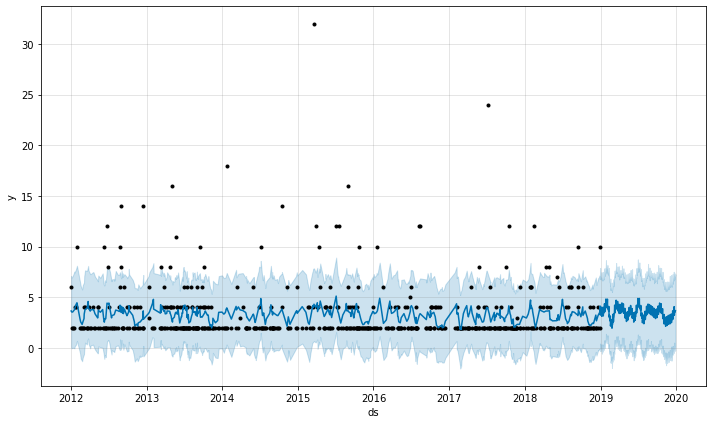

In [168]:
fig1 = m.plot(forecast)

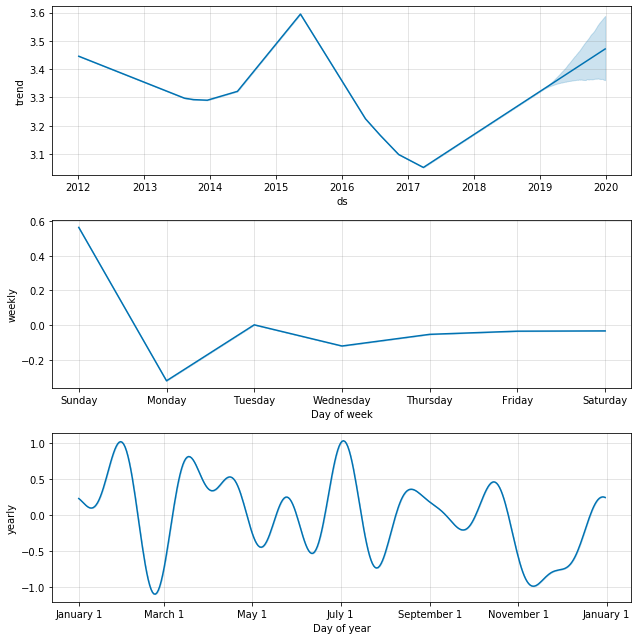

In [169]:
fig2 = m.plot_components(forecast)

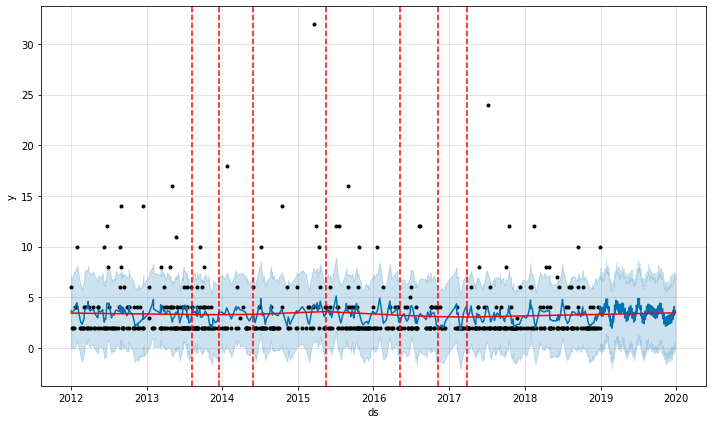

In [170]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [173]:
forecast = Prophet(interval_width = 0.90).fit(df_sample).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


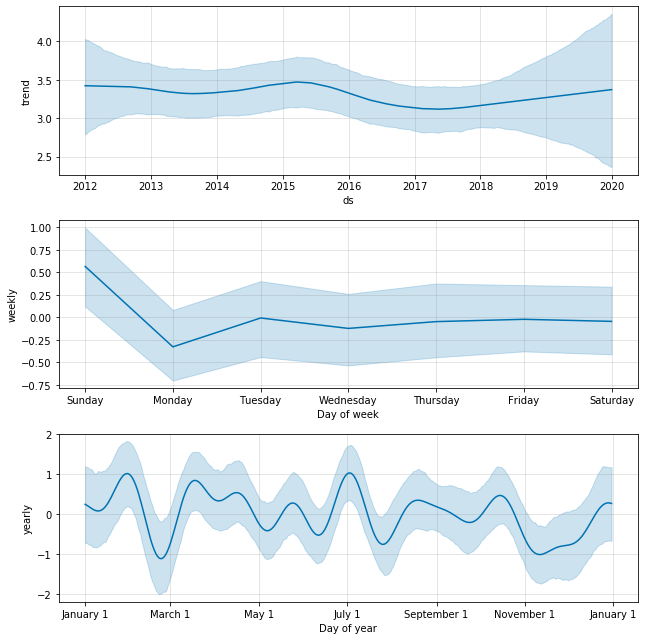

In [174]:
m = Prophet(mcmc_samples = 300)
forecast = m.fit(df_sample).predict(future)
fig = m.plot_components(forecast)